In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as n

In [81]:
vocab_size = 10000  
maxlen = 500  

In [82]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=vocab_size)

x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)


In [112]:
model = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=256, input_length=maxlen),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

C:\Users\bloss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [113]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [114]:
# Step 5: Train the model
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=502,
    validation_split=0.2,
    verbose=2
)


Epoch 1/30
40/40 - 17s - 427ms/step - accuracy: 0.5114 - loss: 0.6932 - val_accuracy: 0.5152 - val_loss: 0.6918
Epoch 2/30
40/40 - 11s - 277ms/step - accuracy: 0.5429 - loss: 0.6874 - val_accuracy: 0.5384 - val_loss: 0.6790
Epoch 3/30
40/40 - 11s - 287ms/step - accuracy: 0.5835 - loss: 0.6621 - val_accuracy: 0.6708 - val_loss: 0.6261
Epoch 4/30
40/40 - 11s - 270ms/step - accuracy: 0.6514 - loss: 0.6188 - val_accuracy: 0.8228 - val_loss: 0.4836
Epoch 5/30
40/40 - 12s - 297ms/step - accuracy: 0.6248 - loss: 0.6595 - val_accuracy: 0.6892 - val_loss: 0.6129
Epoch 6/30
40/40 - 12s - 292ms/step - accuracy: 0.6827 - loss: 0.5931 - val_accuracy: 0.7328 - val_loss: 0.5462
Epoch 7/30
40/40 - 10s - 262ms/step - accuracy: 0.6732 - loss: 0.6195 - val_accuracy: 0.7372 - val_loss: 0.5845
Epoch 8/30
40/40 - 11s - 264ms/step - accuracy: 0.7258 - loss: 0.5759 - val_accuracy: 0.5574 - val_loss: 0.6522
Epoch 9/30
40/40 - 12s - 289ms/step - accuracy: 0.7235 - loss: 0.5247 - val_accuracy: 0.5994 - val_loss:

In [115]:
results = model.evaluate(x_test, y_test)
print(f"\nPredicted Accuracy: {results[1]*100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8188 - loss: 0.4237

Predicted Accuracy: 82.30%


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.74      0.83     12500
    Positive       0.79      0.95      0.86     12500

    accuracy                           0.84     25000
   macro avg       0.86      0.84      0.84     25000
weighted avg       0.86      0.84      0.84     25000



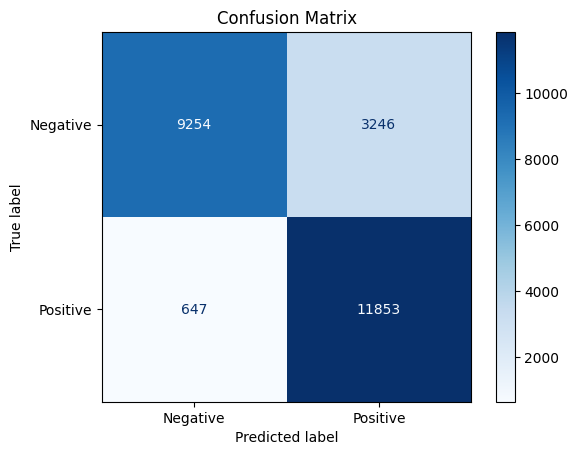

In [116]:

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.6).astype("int32")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


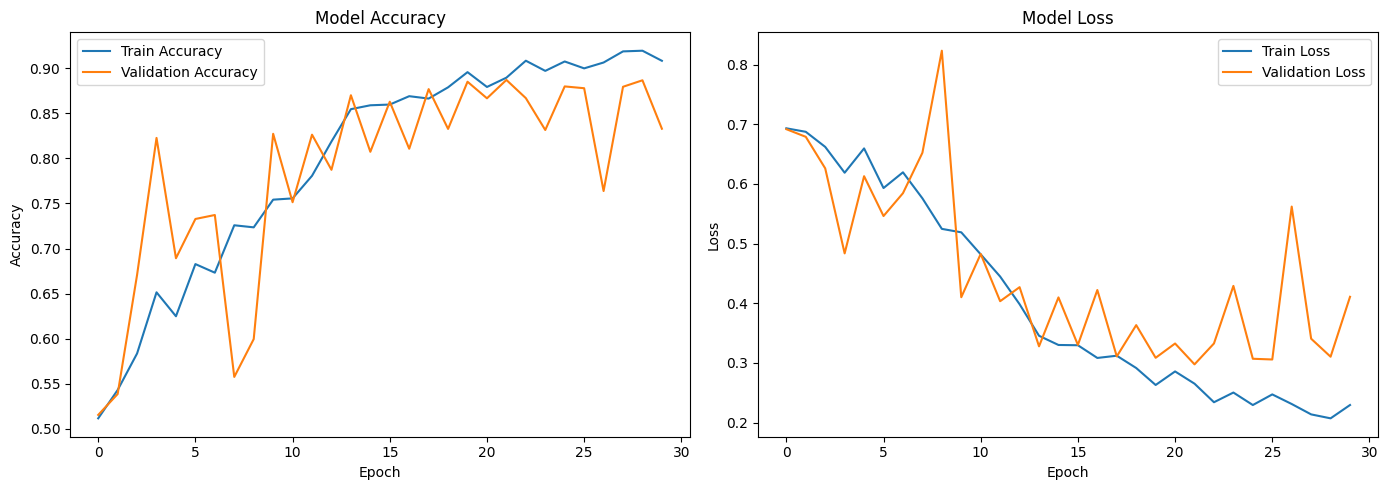

In [117]:

# Visualize accuracy and loss
if 'history' in locals() or 'history' in globals():
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("Training history not available for plotting.")


In [118]:

word_index = keras.datasets.imdb.get_word_index()
index_word = {v + 3: k for k, v in word_index.items()}
index_word[0], index_word[1], index_word[2], index_word[3] = '<PAD>', '<START>', '<UNK>', '<UNUSED>'

def decode_review(text_sequence):
    return ' '.join([index_word.get(i, '?') for i in text_sequence])

sample_index = 10
sample_review = x_test[sample_index]
decoded = decode_review(x_test[sample_index])
true_label = y_test[sample_index]

prediction = model.predict(n.expand_dims(sample_review, axis=0))[0][0]
predicted_label = int(prediction >= 0.5)

print(f"\n Review: {decoded}")
print(f" Actual Sentiment: {'Positive' if true_label else 'Negative'}")
print(f" Predicted Sentiment: {'Positive' if predicted_label else 'Negative'} (Accuracy: {prediction*100:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step

 Review: <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PA

In [119]:
word_index = keras.datasets.imdb.get_word_index()
index_word = {v + 3: k for k, v in word_index.items()}
index_word[0], index_word[1], index_word[2], index_word[3] = '<PAD>', '<START>', '<UNK>', '<UNUSED>'

def decode_review(text_sequence):
    return ' '.join([index_word.get(i, '?') for i in text_sequence])

sample_index = 4
sample_review = x_test[sample_index]
decoded = decode_review(x_test[sample_index])
true_label = y_test[sample_index]

prediction = model.predict(n.expand_dims(sample_review, axis=0))[0][0]
predicted_label = int(prediction >= 0.5)

print(f"\n Review: {decoded}")
print(f" Actual Sentiment: {'Positive' if true_label else 'Negative'}")
print(f" Predicted Sentiment: {'Positive' if predicted_label else 'Negative'} (Accuracy: {prediction*100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step

 Review: <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PA

In [120]:
word_index = keras.datasets.imdb.get_word_index()
index_word = {v + 3: k for k, v in word_index.items()}
index_word[0], index_word[1], index_word[2], index_word[3] = '<PAD>', '<START>', '<UNK>', '<UNUSED>'

def decode_review(text_sequence):
    return ' '.join([index_word.get(i, '?') for i in text_sequence])

sample_index = 6
sample_review = x_test[sample_index]
decoded = decode_review(x_test[sample_index])
true_label = y_test[sample_index]

prediction = model.predict(n.expand_dims(sample_review, axis=0))[0][0]
predicted_label = int(prediction >= 0.5)

print(f"\n Review: {decoded}")
print(f" Actual Sentiment: {'Positive' if true_label else 'Negative'}")
print(f" Predicted Sentiment: {'Positive' if predicted_label else 'Negative'} (Accuracy: {prediction*100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step

 Review: later used by frank <UNK> in mr deeds goes to town and meet john <UNK> but in <UNK> no one individual is cast as a hero or heroine the story is told through a series of scenes that are combined in a special effect known as montage the editing and selection of short segments to produce a desired effect on the viewer d w griffith also used the montage but no one <UNK> it so well as <UNK> br br the artistic filming of the crew sleeping in their is <UNK> by the <UNK> swinging of tables suspended from chains in the <UNK> in contrast the confrontation between the crew and their officers is charged with electricity and the <UNK> <UNK> of the masses demonstrate their rage with injustice br br <UNK> introduced the technique of showing an action and repeating it again but from a slightly different angle to demonstrate intensity the breaking of a plate bearing the words give us this day our daily bread <UNK> the beginning of the end this technique 

In [121]:
word_index = keras.datasets.imdb.get_word_index()
index_word = {v + 3: k for k, v in word_index.items()}
index_word[0], index_word[1], index_word[2], index_word[3] = '<PAD>', '<START>', '<UNK>', '<UNUSED>'

def decode_review(text_sequence):
    return ' '.join([index_word.get(i, '?') for i in text_sequence])

sample_index = 8
sample_review = x_test[sample_index]
decoded = decode_review(x_test[sample_index])
true_label = y_test[sample_index]

prediction = model.predict(n.expand_dims(sample_review, axis=0))[0][0]
predicted_label = int(prediction >= 0.5)

print(f"\n Review: {decoded}")
print(f" Actual Sentiment: {'Positive' if true_label else 'Negative'}")
print(f" Predicted Sentiment: {'Positive' if predicted_label else 'Negative'} (Accuracy: {prediction*100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step

 Review: <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PA

In [122]:
word_index = keras.datasets.imdb.get_word_index()
index_word = {v + 3: k for k, v in word_index.items()}
index_word[0], index_word[1], index_word[2], index_word[3] = '<PAD>', '<START>', '<UNK>', '<UNUSED>'

def decode_review(text_sequence):
    return ' '.join([index_word.get(i, '?') for i in text_sequence])

sample_index = 1
sample_review = x_test[sample_index]
decoded = decode_review(x_test[sample_index])
true_label = y_test[sample_index]

prediction = model.predict(n.expand_dims(sample_review, axis=0))[0][0]
predicted_label = int(prediction >= 0.5)

print(f"\n Review: {decoded}")
print(f" Actual Sentiment: {'Positive' if true_label else 'Negative'}")
print(f" Predicted Sentiment: {'Positive' if predicted_label else 'Negative'} (Accuracy: {prediction*100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step

 Review: <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PA